# Mirror Randomized Benchmarking (MRB)

In [1]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

## Set IQM Token if using Resonance.

In [3]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Mirror RB Configuration

In [4]:
from iqm.benchmarks.randomized_benchmarking.mirror_rb.mirror_rb import *

In [5]:
EXAMPLE_MRB = MirrorRBConfiguration(
    qubits_array=[[0,1],
                  [0,1,3,4]],
                  #[0,1,3,4,8,9],
                  #[0,1,3,4,8,9,13,14],
                  # [0,1,3,4,8,9,13,14,17,18],
                  # [0,1,3,4,8,9,13,14,17,18,2,7],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11]],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11,15,16],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11,15,16,12,19]],
    depths_array=[[2**m for m in range(9)],
                  [2**m for m in range(8)]],
                  # [2**m for m in range(7)],
                  # [2**m for m in range(6)],
                  # [2**(m+1)-1 for m in range(6)],
                  # [2**(m+1)-1 for m in range(6)],
                  # [2**(m+1)-1 for m in range(5)],
                  # [2**(m+1)-1 for m in range(5)],
                  # [2**(m+1)-1 for m in range(4)],
                  # [2**(m+1)-1 for m in range(4)]],
                  # If only one list of depths is specified, it applies to all qubit layouts
                  # If less depths than qubit layouts is specified, the first one is applied
    num_circuit_samples=10,
    num_pauli_samples=5,
    shots=2**8,
    two_qubit_gate_ensemble={"CZGate": 0.8, "iSwapGate": 0.2}, # {GATE: PROBABILITY}
    density_2q_gates=0.25,
    calset_id=None,
)

## Run the experiment

In [6]:
benchmark_mrb = MirrorRandomizedBenchmarking(backend, EXAMPLE_MRB)
run_mrb = benchmark_mrb.run()

2025-01-10 11:01:52,545 - iqm.benchmarks.logging_config - INFO - Executing MRB on qubits [0, 1]. Will generate and submit all 10x5 MRB circuits for each depth [2, 4, 8, 16, 32, 64, 128, 256, 512]
2025-01-10 11:01:52,546 - iqm.benchmarks.logging_config - INFO - Depth 2 - Generating all circuits
2025-01-10 11:01:59,842 - iqm.benchmarks.logging_config - INFO - Submitting batch with 50 circuits corresponding to qubits [0, 1]
2025-01-10 11:01:59,849 - iqm.benchmarks.logging_config - INFO - Job for layout [0, 1] & depth 2 submitted successfully!
2025-01-10 11:01:59,892 - iqm.benchmarks.logging_config - INFO - Depth 4 - Generating all circuits
2025-01-10 11:02:06,947 - iqm.benchmarks.logging_config - INFO - Submitting batch with 50 circuits corresponding to qubits [0, 1]
2025-01-10 11:02:06,948 - iqm.benchmarks.logging_config - INFO - Job for layout [0, 1] & depth 4 submitted successfully!
2025-01-10 11:02:07,125 - iqm.benchmarks.logging_config - INFO - Depth 8 - Generating all circuits
2025-

## Analyze the results

In [7]:
result_mrb = benchmark_mrb.analyze()

2025-01-10 11:06:06,147 - iqm.benchmarks.logging_config - INFO - Post-processing MRB for qubits [0, 1]
2025-01-10 11:06:06,184 - iqm.benchmarks.logging_config - INFO - Depth 2
2025-01-10 11:06:06,184 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 11:06:06,264 - iqm.benchmarks.logging_config - INFO - Depth 4
2025-01-10 11:06:06,264 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 11:06:06,342 - iqm.benchmarks.logging_config - INFO - Depth 8
2025-01-10 11:06:06,343 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 11:06:06,422 - iqm.benchmarks.logging_config - INFO - Depth 16
2025-01-10 11:06:06,422 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 11:06:07,133 - iqm.benchmarks.logging_config - INFO - Depth 32
2025-01-10 11:06:07,134 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-01-10 11:06:07,214 - iqm.benchmarks.logging_config - INFO - Depth 64
2

### List all the keys in the attributes of the dataset

In [8]:
attr_keys = sorted([str(x) for x in list(run_mrb.dataset.attrs.keys())])
for k in attr_keys:
    print(k)

0
1
backend_configuration_name
backend_name
benchmark
calset_id
density_2q_gates
depths_array
execution_timestamp
max_gates_per_batch
num_circuit_samples
num_pauli_samples
physical_layout
qiskit_optim_level
qubits_array
routing_method
session_timestamp
shots
two_qubit_gate_ensemble


In [9]:
run_mrb.dataset.attrs[0]

{'qubits': [0, 1],
 'depth_2': {'time_circuit_generation': 116.14302134513855,
  'time_submit': 0.007565975189208984,
  'time_retrieve': 0.06883907318115234,
  'all_job_metadata': {'batch_job_1': {'job_id': 'f8d9d789-0e9a-4086-ab36-685064a7b66e',
    'backend': 'aer_simulator',
    'status': 'job has successfully run',
    'circuits_in_batch': None,
    'shots': None,
    'timestamps': None}}},
 'depth_4': {'time_circuit_generation': 116.14302134513855,
  'time_submit': 0.0004930496215820312,
  'time_retrieve': 0.0007040500640869141,
  'all_job_metadata': {'batch_job_1': {'job_id': '87e367b7-c3ae-4457-8a2d-7b169c528033',
    'backend': 'aer_simulator',
    'status': 'job has successfully run',
    'circuits_in_batch': None,
    'shots': None,
    'timestamps': None}}},
 'depth_8': {'time_circuit_generation': 116.14302134513855,
  'time_submit': 0.0004889965057373047,
  'time_retrieve': 0.0005979537963867188,
  'all_job_metadata': {'batch_job_1': {'job_id': 'd84330c9-101f-40ff-bea8-f5e4

### The observation object contains the benchmark results

In [10]:
result_mrb.observations

{0: {'avg_gate_fidelity': {'value': 0.9710221314803044,
   'uncertainty': 0.001462493086363885}},
 1: {'avg_gate_fidelity': {'value': 0.9473471466489307,
   'uncertainty': 0.00285118172031131}}}

### Generate plots

In [11]:
for k in result_mrb.plots.keys():
    print(k)

[0, 1]
[0, 1, 3, 4]
all_qubit_layouts


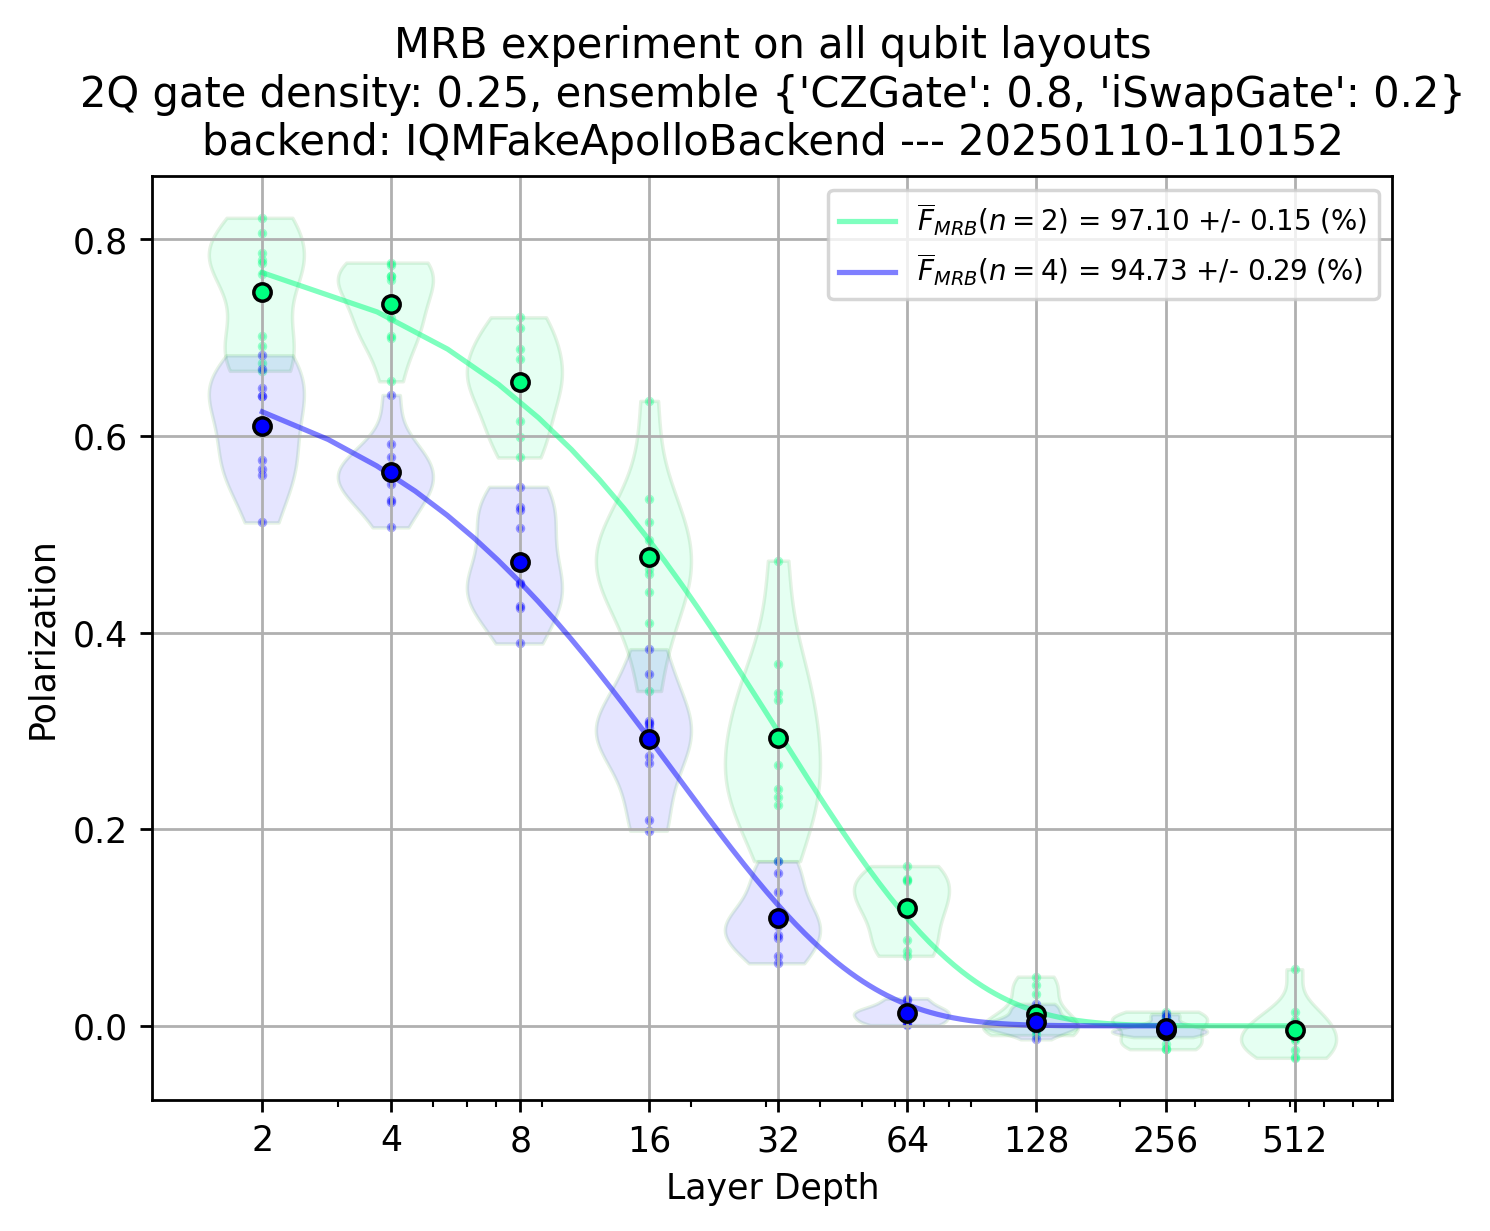

In [12]:
key_mrb_plot = "all_qubit_layouts"
result_mrb.plot(key_mrb_plot)